In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))

from src.utils import list_images
from src.embed import load_clip, embed_images
from src.recommend import CLIPRecommender, rerank_by_palette
from src.board import make_moodboard

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
image_paths = list_images("../data/sample")
len(image_paths), image_paths


(3,
 ['../data/sample/sample_01.jpg',
  '../data/sample/sample_02.jpg',
  '../data/sample/sample_03.jpg'])

In [3]:
model, preprocess, device = load_clip("ViT-B-32", "openai")
emb = embed_images(image_paths, model, preprocess, device)

rec = CLIPRecommender(embeddings=emb, image_paths=image_paths)
print("Embeddings + recommender ready.")


/Users/xaiair/pinpalettes-ml/venv/lib/python3.14/site-packages/open_clip/factory.py:450: UserWarning: QuickGELU mismatch between final model config (quick_gelu=False) and pretrained tag 'openai' (quick_gelu=True).
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.38it/s]

Embeddings + recommender ready.


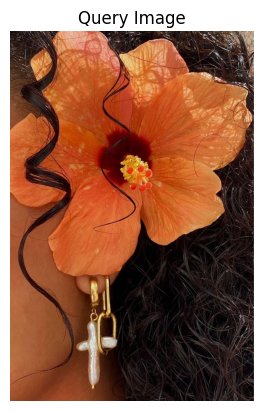

In [4]:
query_idx = 0
query_path = image_paths[query_idx]
query_img = Image.open(query_path).convert("RGB")

plt.imshow(query_img)
plt.title("Query Image")
plt.axis("off")
plt.show()


In [5]:
top_k = min(9, len(image_paths))  # moodboard size target
neighbors, scores = rec.query(emb[query_idx], top_k=top_k)

list(zip(neighbors, scores))


[('../data/sample/sample_01.jpg', 1.0),
 ('../data/sample/sample_02.jpg', 0.6661693453788757),
 ('../data/sample/sample_03.jpg', 0.6314329504966736)]

In [6]:
reranked = rerank_by_palette(query_img, neighbors, top_k=top_k)
reranked


['../data/sample/sample_01.jpg',
 '../data/sample/sample_02.jpg',
 '../data/sample/sample_03.jpg']

In [7]:
out_path = "../results/moodboards/moodboard_query0.png"
make_moodboard(reranked, out_path, tile_size=256, cols=3)

out_path


'../results/moodboards/moodboard_query0.png'

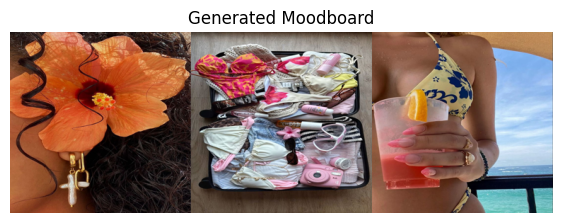

In [8]:
board_img = Image.open(out_path)
plt.figure(figsize=(7,7))
plt.imshow(board_img)
plt.axis("off")
plt.title("Generated Moodboard")
plt.show()


In [9]:
def generate_board(query_idx, cols=3):
    top_k = min(9, len(image_paths))
    neighbors, scores = rec.query(emb[query_idx], top_k=top_k)
    reranked = rerank_by_palette(Image.open(image_paths[query_idx]).convert("RGB"),
                                 neighbors, top_k=top_k)
    out_path = f"../results/moodboards/moodboard_query{query_idx}.png"
    make_moodboard(reranked, out_path, tile_size=256, cols=cols)
    return out_path

generate_board(0)


'../results/moodboards/moodboard_query0.png'